In [1]:
from plotting import *
from ExecuteDO import *
from EvalSketch import Evalsketch


In [2]:
sys.path.insert(0, r'C:\Users\viska\Documents\AceCan')
os.chdir(r"C:\Users\viska\Documents\AceCan")
Output_path = r"C:\Users\viska\Documents\AceCan\Prepros"
# os.mkdir(Output_path)
load_data = 1
num = 40
base = 8
topk = 2000
col_range =  [8000]
row_range = [5]
display = 20
pca_comp = 8
d = base ** pca_comp  
data_dir = r'.\bki'    
test = 0
name = os.path.join(Output_path, f'b{base}topk{topk}N{num}test{test}')
idx_plot = 3
# os.mkdir(name)
if test:
    pixel = 400*300
    pt = Plotting()
else:
    pixel = 1004 * 1344
    pt = Plotting(ver = 1004, hor = 1344 )
# os.mkdir(name)
# exact_pdh0 = pd.read_csv(f'{name}/exact_pdh.cvs', names = list(range(8)) + ['freq','val','u1','u2','k3'], sep = ' ')

Processing 40 [test :0] images with original size [1004, 1344, 35] 
=============== run step PCA ===============
Explained Variance Ratio [0.75  0.139 0.067 0.026 0.009 0.003 0.002 0.001 0.001 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
========= Intensity ==============
cutoffH is set to be mean 1047.0
norm_data -0.9999134666880282 0.5728232069979671
rebin, min/mac 0.0 6.0
Exact Counting time 3.83
2709.65
#exact_pdh 762 2709.65
        0    1    2    3    4    5    6    7    freq      val
0     0.0  5.0  2.0  3.0  4.0  3.0  3.0  4.0  270965  9291432
1     0.0  5.0  3.0  3.0  4.0  3.0  3.0  4.0  255433  9291496
2     0.0  5.0  4.0  4.0  4.0  4.0  3.0  3.0  245625  7227688
3     0.0  5.0  4.0  4.0  4.0  4.0  3.0  4.0  243916  9324840
4     0.0  5.0  3.0  4.0  4.0  4.0  3.0  3.0  229894  7227624
...   ...  ...  ...  ...  ...  ...  ...  ...     ...      ...
1995  0.0  6.0  2.0  4.0

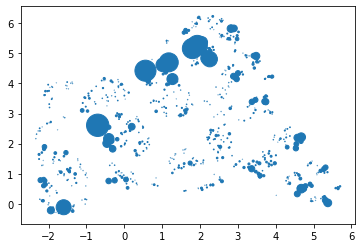

In [3]:
exact_pdh, stream_1D, mask = execute_prepro(data_dir, base, num, pca_comp, topk, test)

In [5]:
np.savetxt(f'{name}/exact_pdh_high.cvs', exact_pdh)
np.savetxt(f'{name}/stream_1D.txt', stream_1D)
np.savetxt(f'{name}/mask.txt', mask)

## K means

In [10]:
pt.n_hor = 5
pt.n_ver = 8
pt.fig_hor = 23

2


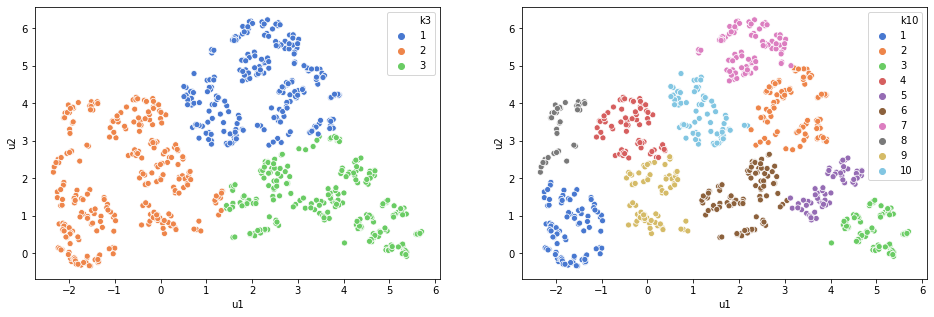

In [5]:
k_names = process_kmean(exact_pdh,  N_clusters = [3,10])

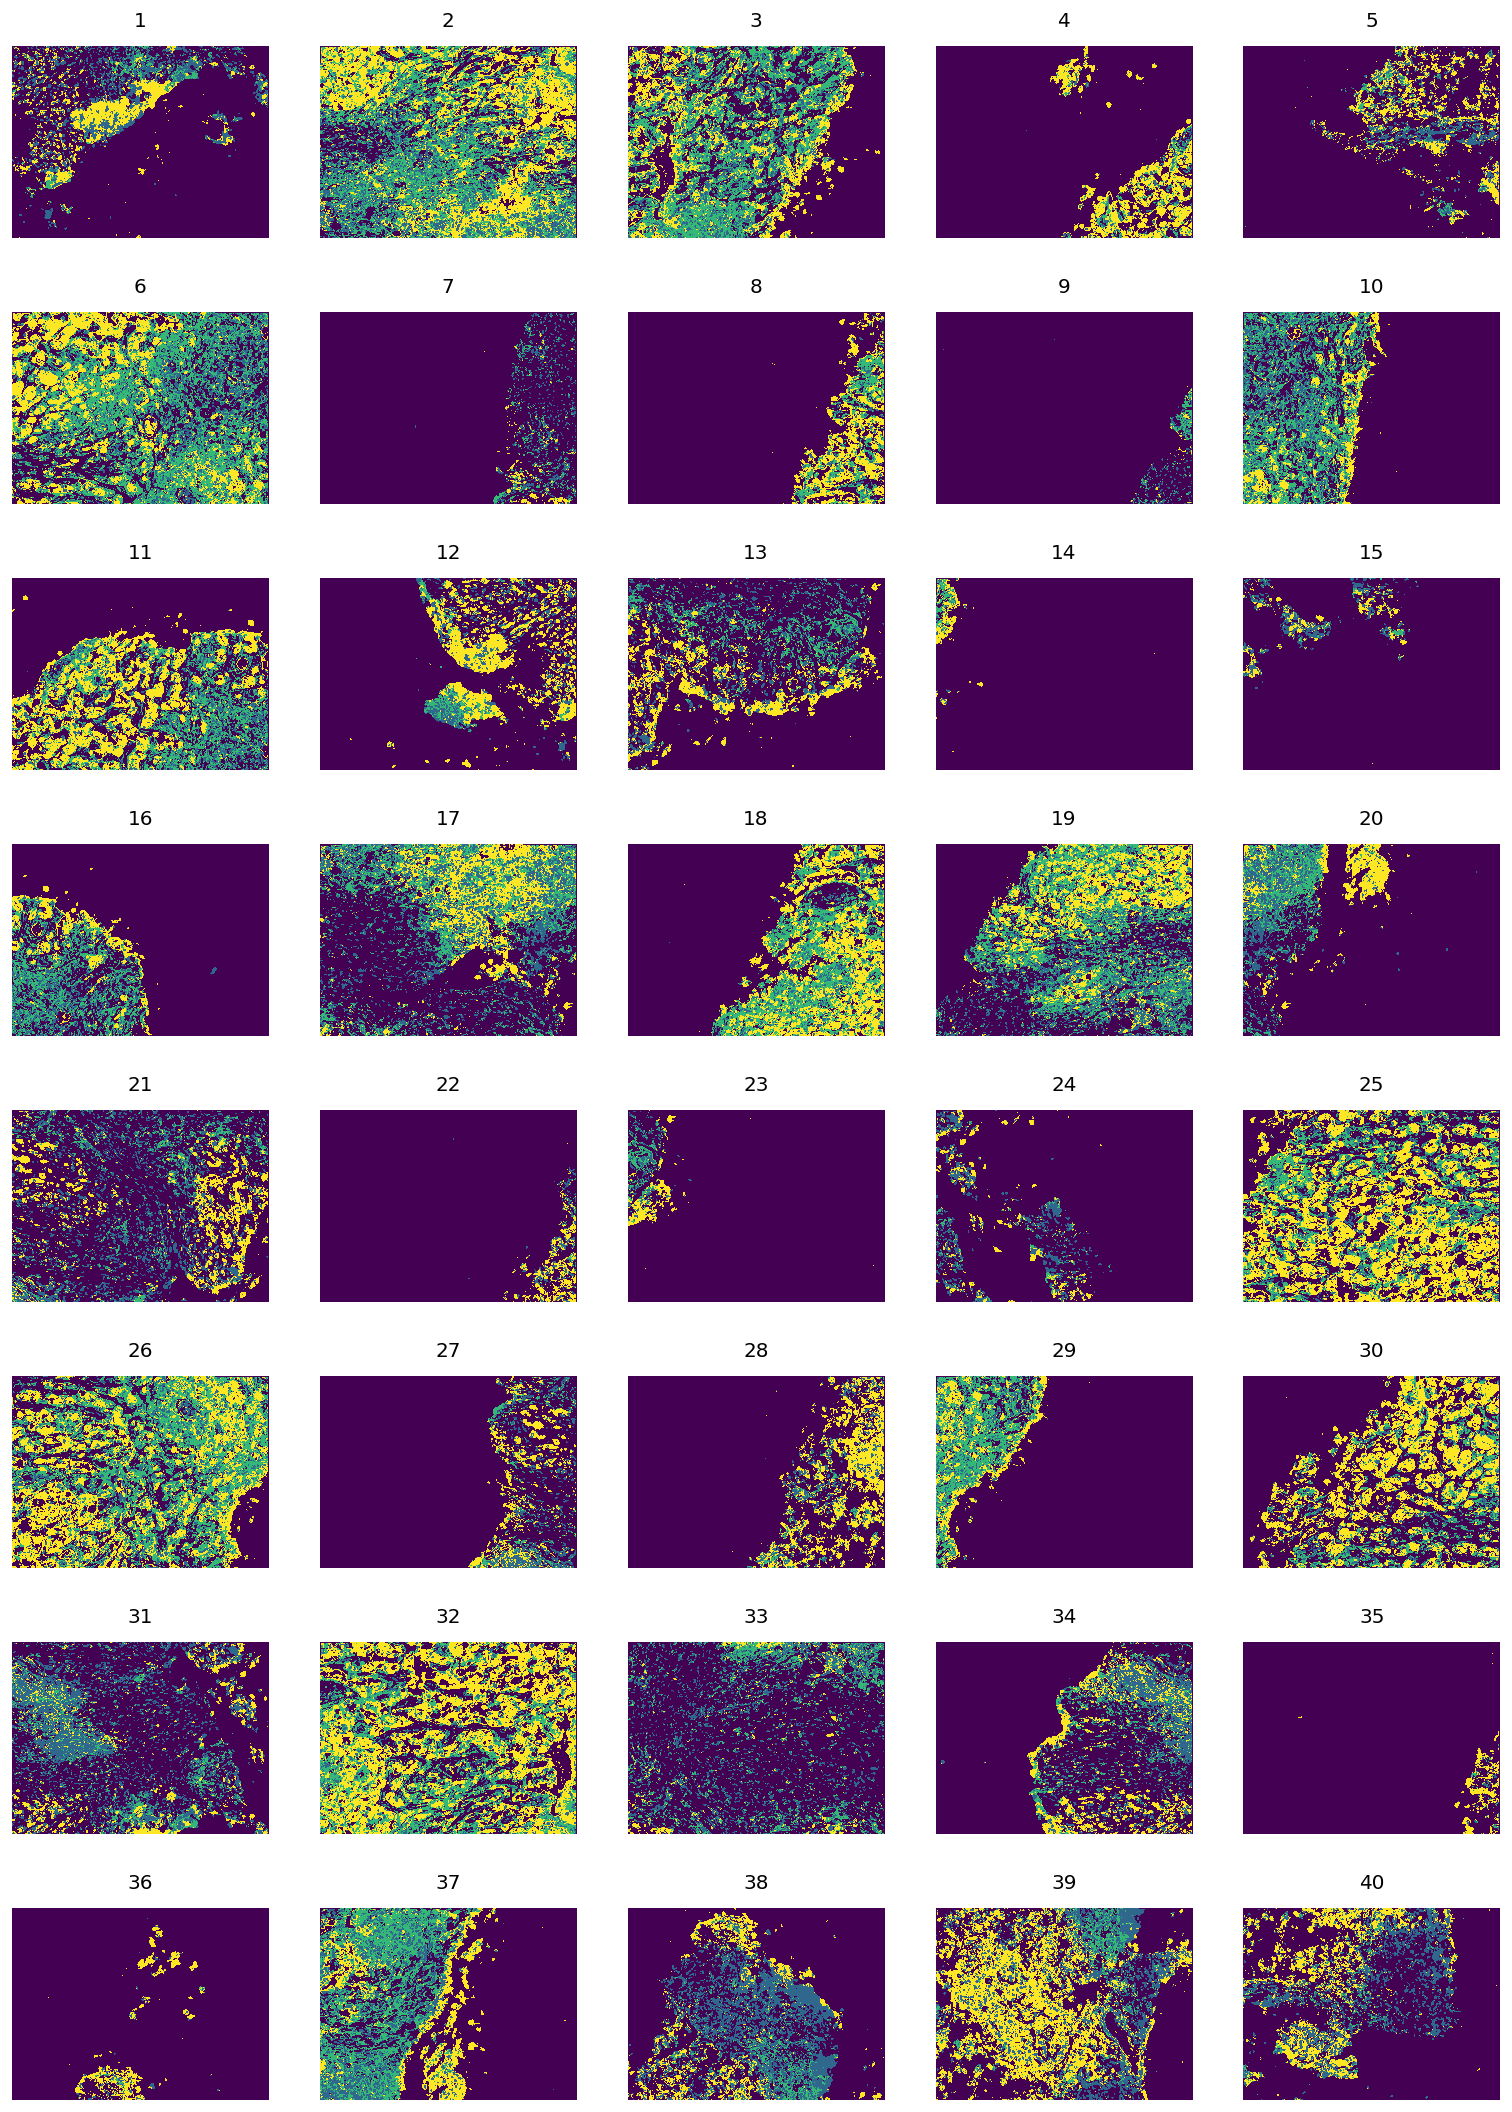

In [11]:
# 3 clulsters
# k = 'k3'
# final_umap, _ = plot_kmean_clusters(stream_1D, mask, exact_pdh, k,  bg = -1, color = 3, sgn = 1  )
pt.plot_masked(final_umap)

## 10 clusters

In [23]:
k = 'k10'

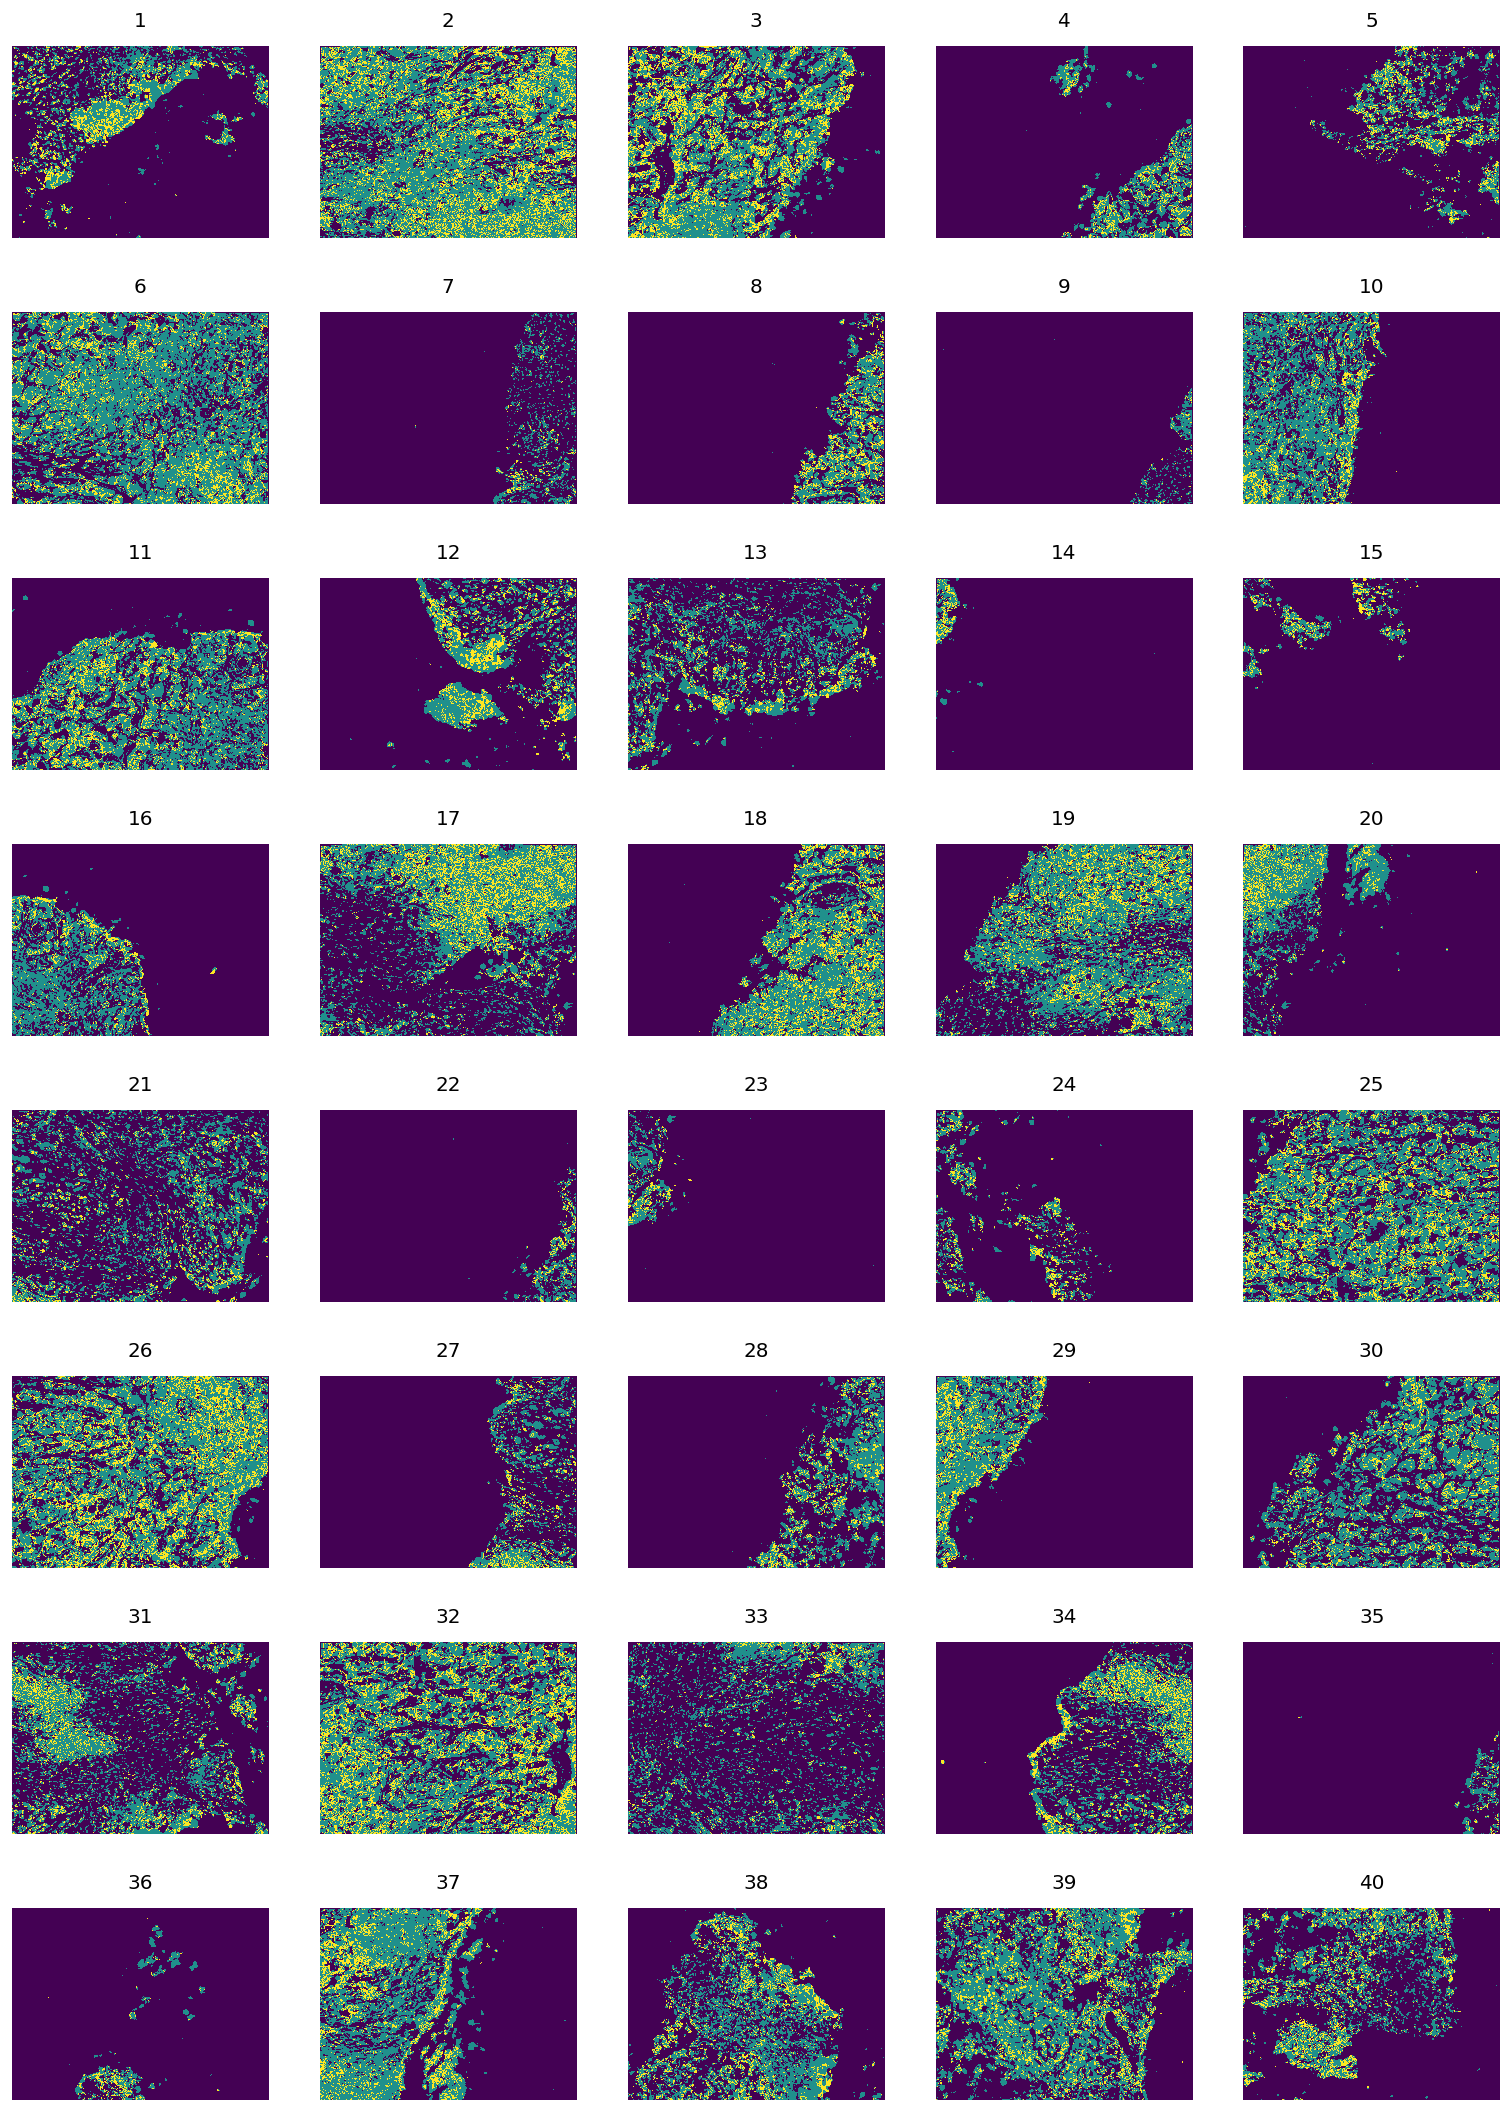

In [25]:
cancer_clu = [10,5]

HHvals_c2 = exact_pdh.loc[ exact_pdh[k].eq(cancer_clu[0]) | exact_pdh[k].eq(cancer_clu[1]), 'val'].values
final_umap, masked_streams  = plot_kmean_binary(stream_1D, mask, HHvals_c2)
pt.plot_masked(final_umap)
# top 2 cancer cell clusterse

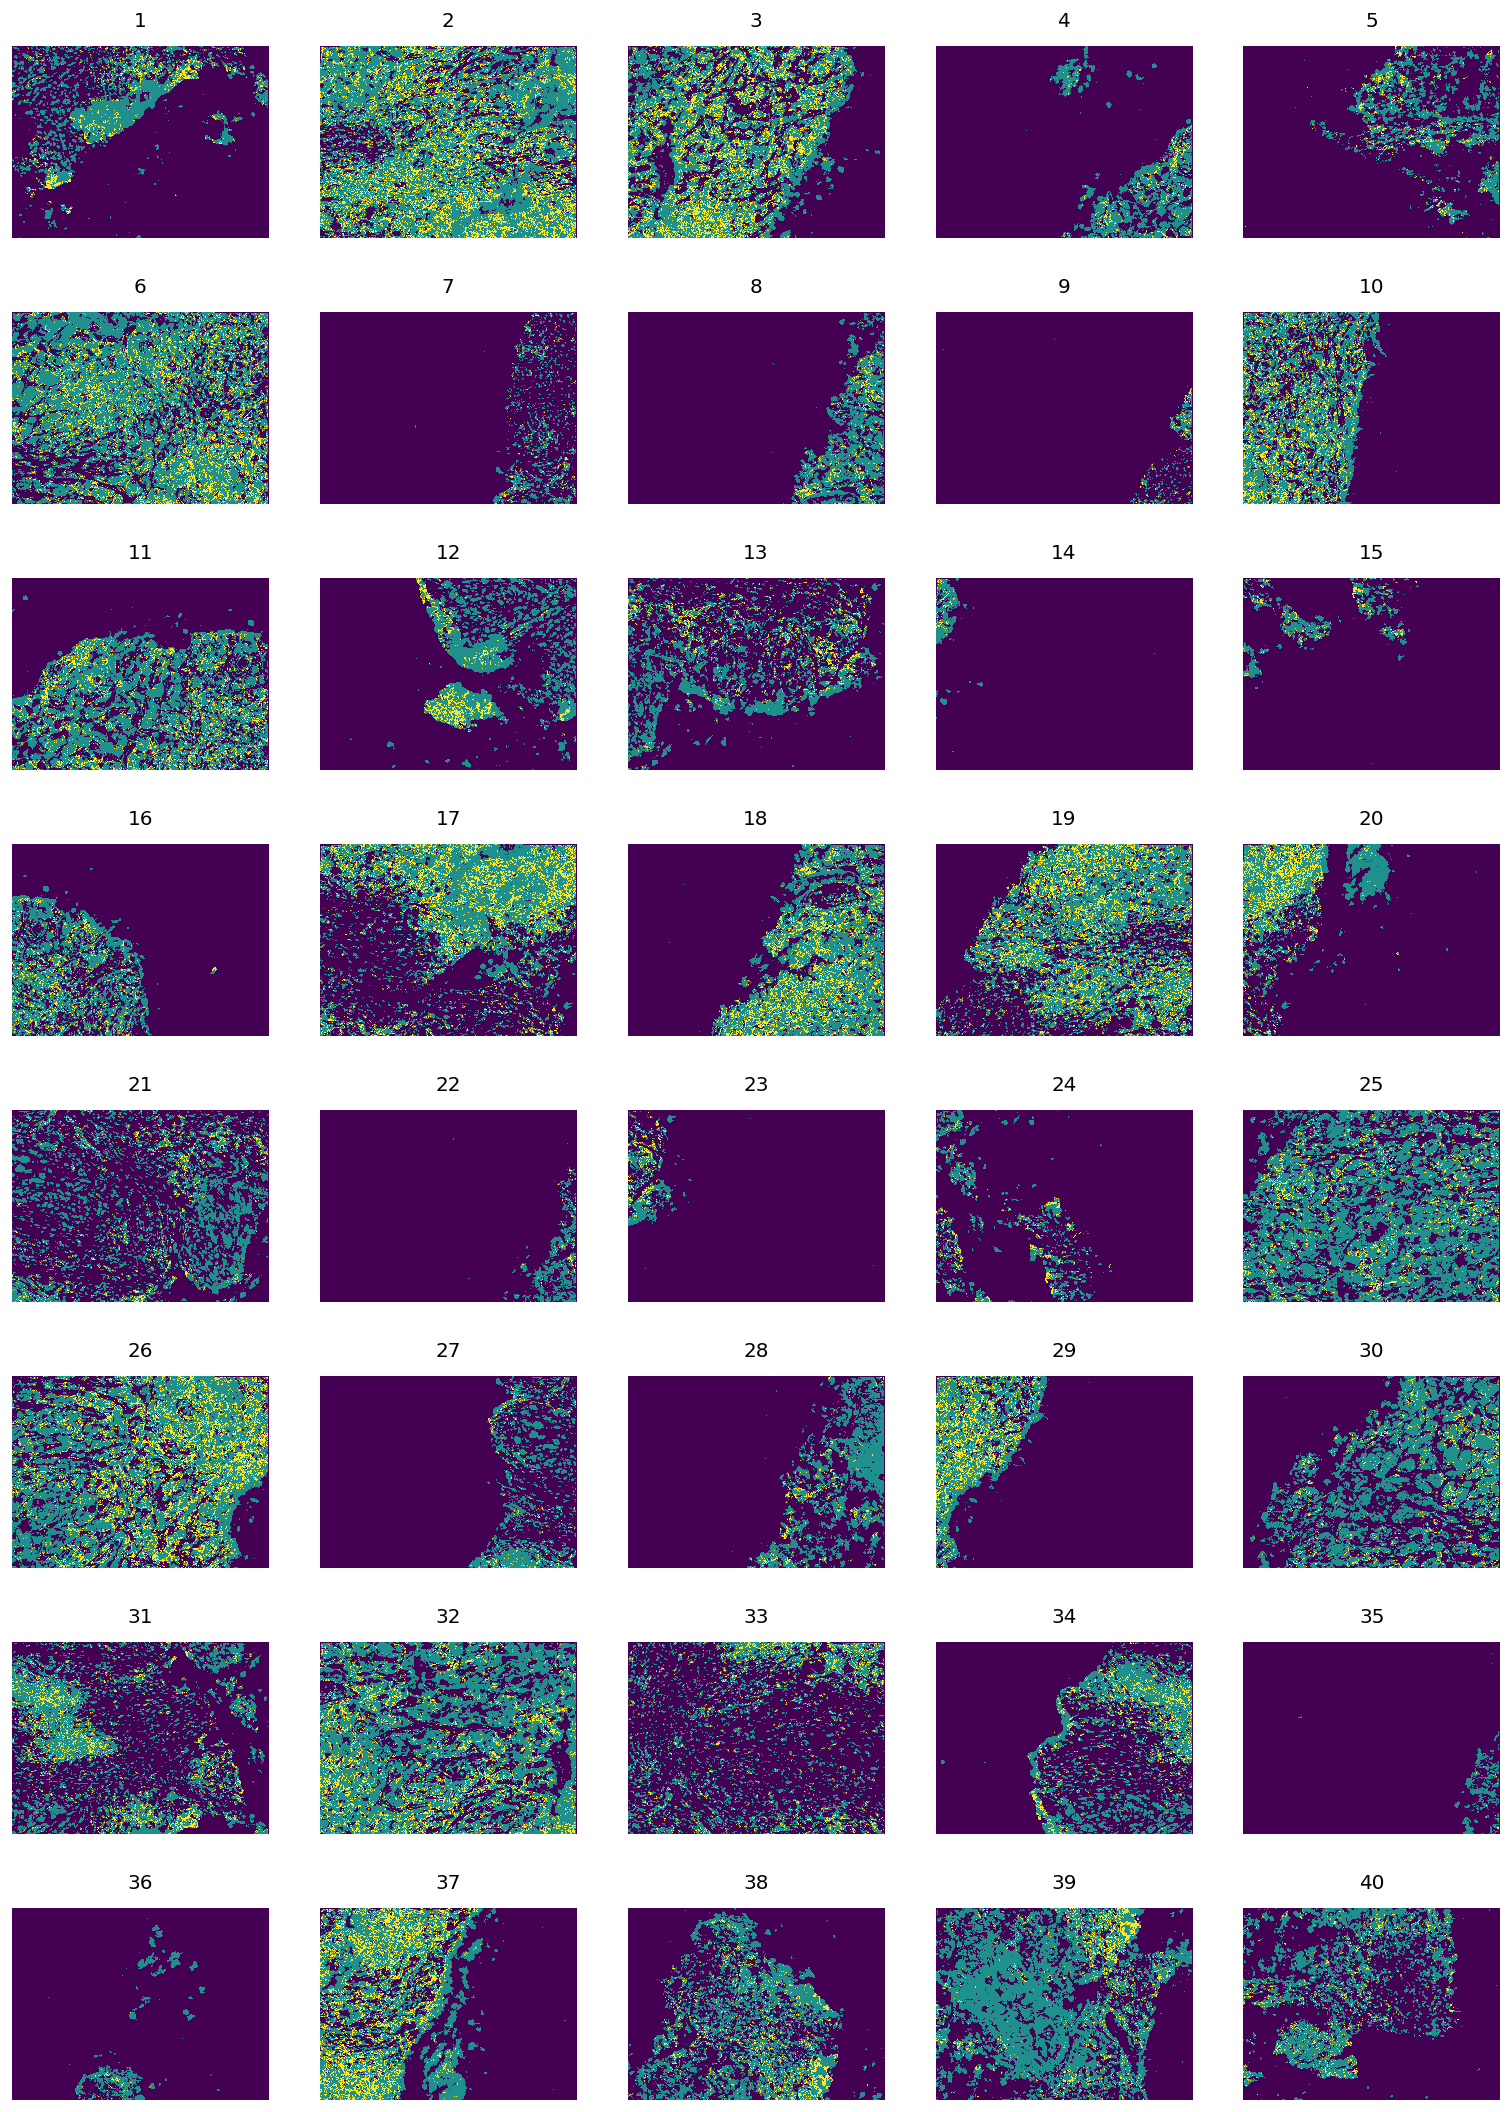

In [24]:
cancer_clu = [9,6]
HHvals_c2 = exact_pdh.loc[ exact_pdh[k].eq(cancer_clu[0]) | exact_pdh[k].eq(cancer_clu[1]), 'val'].values
final_umap, masked_streams  = plot_kmean_binary(stream_1D, mask, HHvals_c2)
pt.plot_masked(final_umap)
# top 2 cancer cell clusterse

# Running Count Sketch

In [14]:
len(stream_1D), np.log10(len(stream_1D))

(15607082, 7.193321712174564)

In [12]:
stream_1D = stream_1D.astype("Int64")
stream_1D.shape
vec = np.zeros(base**pca_comp)
print(vec.shape)
for val in stream_1D:
    vec[val] += 1

C:\Users\viska\.conda\envs\streaming\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
(16777216,)


In [15]:
np.log10(len(vec))

7.224719895935548

In [16]:
import torch
from csh.csvec import CSVec
vec_tr = torch.from_numpy(np.array(vec)).float().to("cuda")
col = 20000
row = 8
cs = CSVec(d = d , c=col, r=row)

cuda


In [17]:
cs.accumulateVec(vec_tr)
HH = cs._findHHK_v(2000)  

In [18]:
sketch_pd = process_sketch_HH(HH,base,pca_comp)


0    1    2    3    4    5    6    7      freq      val
0     0.0  5.0  2.0  3.0  4.0  3.0  3.0  4.0  270965.0  9291432
1     0.0  5.0  3.0  3.0  4.0  3.0  3.0  4.0  255433.0  9291496
2     0.0  5.0  4.0  4.0  4.0  4.0  3.0  3.0  245625.0  7227688
3     0.0  5.0  4.0  4.0  4.0  4.0  3.0  4.0  243916.0  9324840
4     0.0  5.0  3.0  4.0  4.0  4.0  3.0  3.0  229894.0  7227624
...   ...  ...  ...  ...  ...  ...  ...  ...       ...      ...
1995  2.0  5.0  6.0  0.0  0.0  7.0  7.0  1.0    1027.0  4161962
1996  6.0  4.0  5.0  0.0  4.0  5.0  0.0  2.0    1027.0  4374886
1997  0.0  2.0  6.0  3.0  5.0  1.0  6.0  2.0    1027.0  5822352
1998  0.0  2.0  5.0  4.0  4.0  3.0  4.0  3.0    1027.0  7457104
1999  0.0  6.0  1.0  4.0  5.0  6.0  6.0  3.0    1027.0  8083568

[2000 rows x 10 columns]


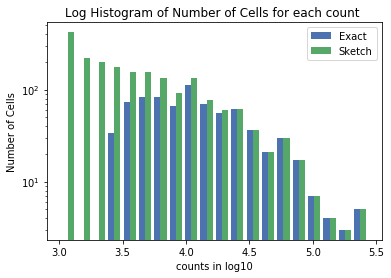

In [21]:
ev = Evalsketch(exact_pdh, sketch_pd, base, pca_comp)


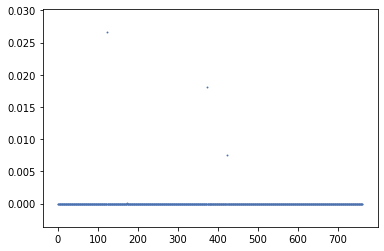

In [22]:
error = ev.plot_rel_error()


## Gluviz Clustering

In [31]:
from glue.core.state import load

In [40]:
data_collection = load(f'{name}\\make_plot.py.data')
data0 = data_collection[0]
# FIND ORDER
sub_range = [0,1,2,3,4,7,6,5]
for subset in sub_range:
    layer_data = data0.subsets[subset]
    print(subset,layer_data['col13'][:10])

In [119]:
cluster = {}
i = 1
for subset in sub_range:
    layer_data = data0.subsets[subset]
    cluster[i] = layer_data['col13'].astype(int)
    i+=1
exact_pdh['cluster'] = np.zeros(len(exact_pdh)).astype(int)
for key in range(1,max(sub_range)+2):
    exact_pdh.loc[cluster[key],'cluster'] = int(key)

In [294]:
def plot_umap_clusters(stream_1D, mask, exact_pdhh, val = 'val', cluster = 'cluster' bg = -1, color = 8 ):
    HHvals = np.array(exact_pdhh[val])
    HHcluster = np.array(exact_pdhh[cluster])
    masked_streams = np.zeros(np.shape(stream_1D))
    for idx, val in enumerate( HHvals): 
        label = HHcluster[idx]
        masked_streams = np.where(stream_1D != val, masked_streams, label)
    final_umap = np.ones(mask.shape) * bg
    binary_umap = np.ones(mask.shape) * bg
    masked_binary = (masked_streams > 0) * 1
    final_umap[mask] = masked_streams
    binary_umap[mask] = masked_binary
    return final_umap, binary_umap,  masked_streams 

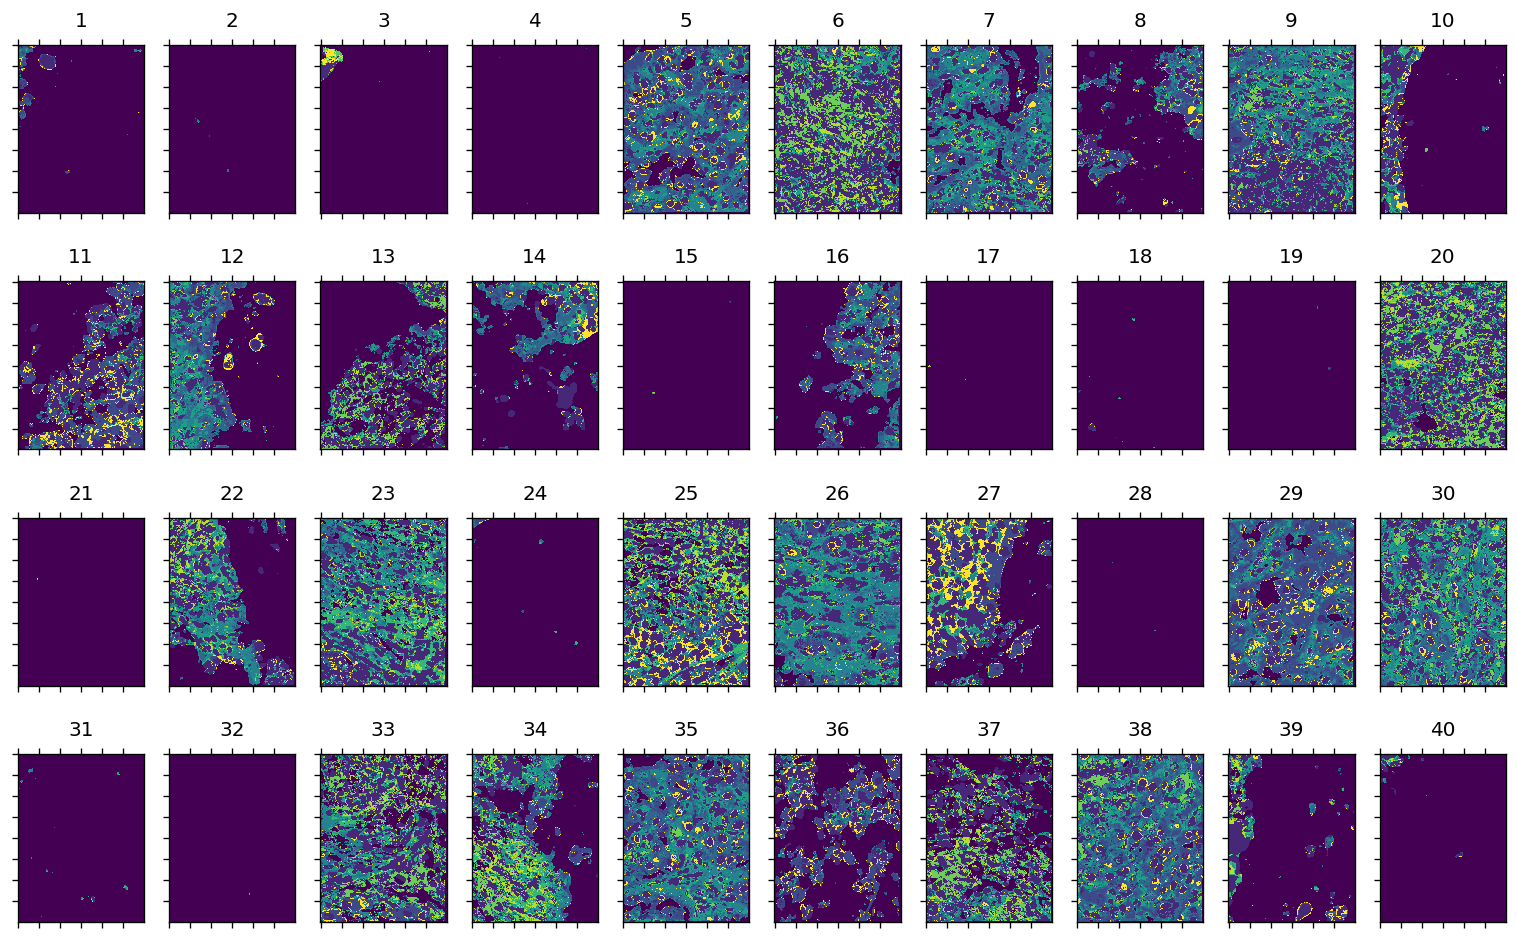

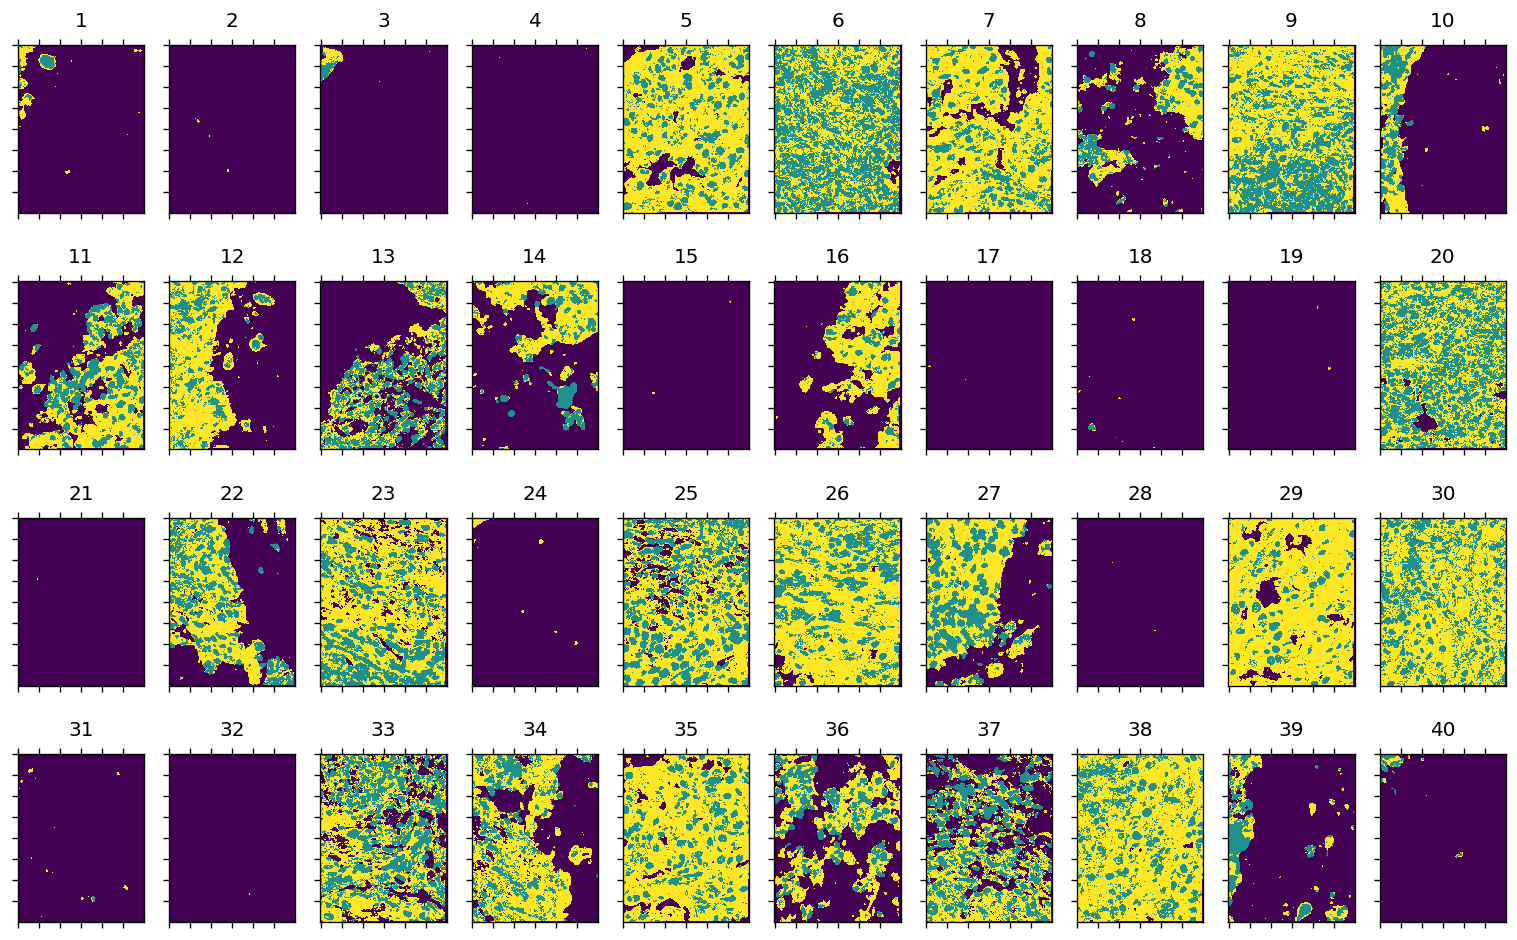

In [138]:
exact_pdhh = exact_pdh
final_umap, binary_umap, masked_streams  = plot_umap_clusters(stream_1D, exact_pdhh)
pt.plot_masked(final_umap)
pt.plot_masked(binary_umap)

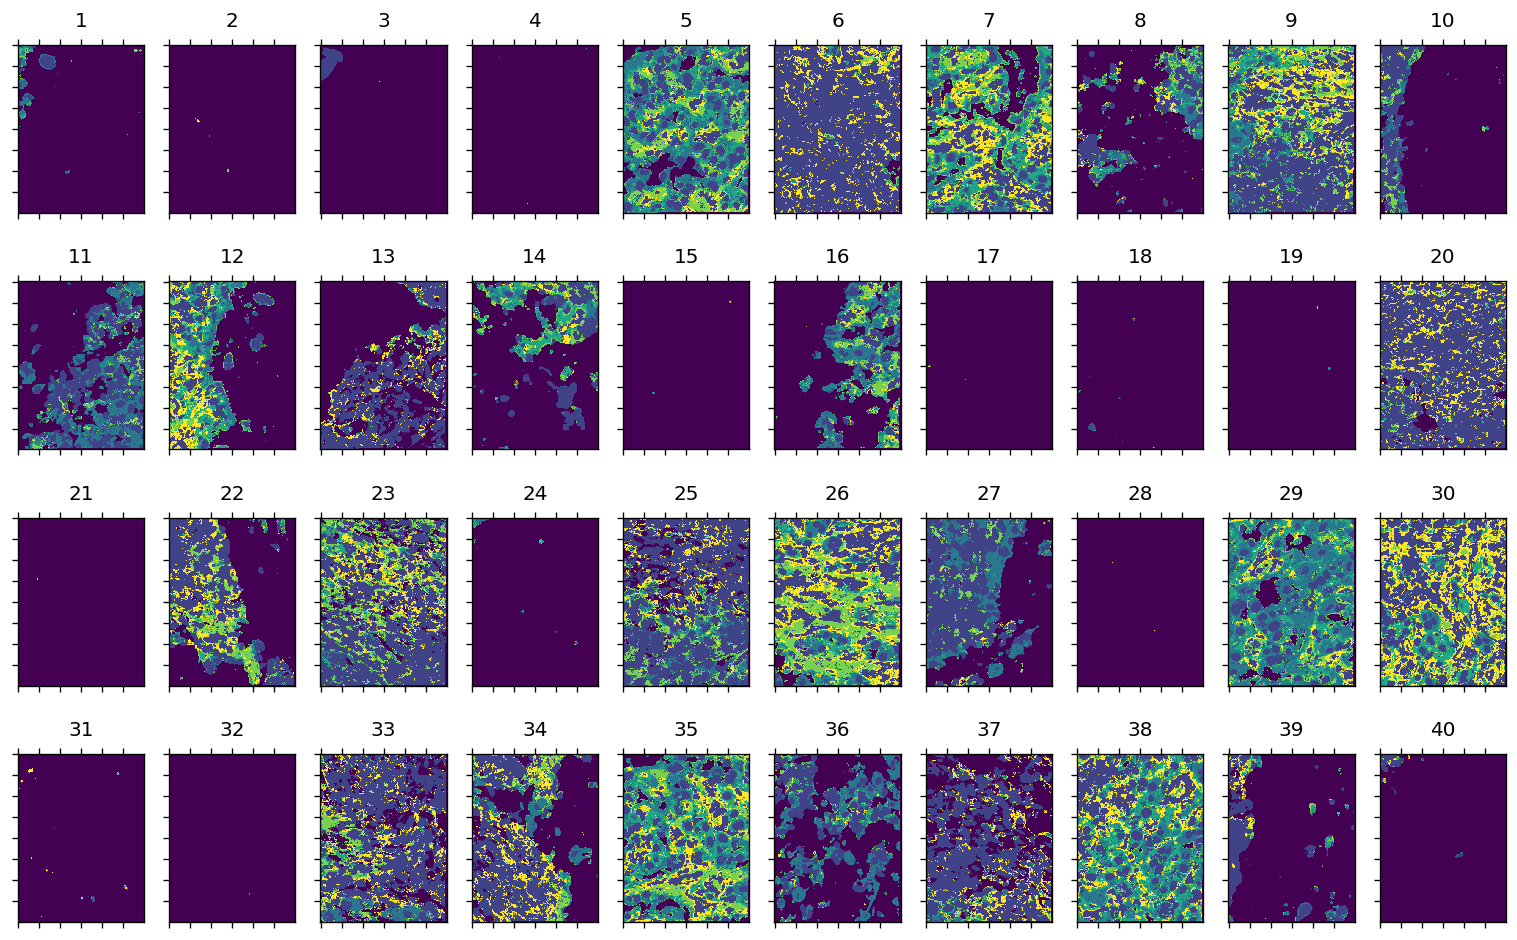

In [136]:
# exact_pdhh = exact_pdh.loc[exact_pdh['cluster'] > 1]
# exact_pdhh = exact_pdh.loc[exact_pdh['cluster'] < 5]
exact_pdhh = exact_pdh
final_umap, binary_umap, masked_streams  = plot_umap_clusters(stream_1D, exact_pdhh)
pt.plot_masked(final_umap)
# cluster 2 pos